In [24]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp,wilcoxon
import pickle


In [13]:
address_main = '/Users/vu/surfdrive/PostDoc/VUMC projrct/Related Matterials/Positive and unlabeled dataset/Code/real Datasets/'
address_date = address_main + 'iris.csv'

address_saving = address_main +'iris pickle.pickle'

In [14]:
df_data = pd.read_csv(address_date,header= None)
df_data.columns = ['x0','x1','x2','x3','text_label']
df_data['real_label']=-1
df_data.loc[df_data['text_label']=='Iris-setosa','real_label'] = +1



In [15]:
size_data = len(df_data)
minmax = MinMaxScaler()
df_data[['x0','x1','x2','x3']] = minmax.fit_transform(df_data[['x0','x1','x2','x3']])

In [16]:
max_counter_ws = 50
max_counter_cs = 50

# TEST cells

# MAIN CELL

In [17]:
dic_inversions_F1_= {}
dic_inversions_LL = {}

In [19]:
#for N_visible in range(1,51):
for N_visible in [10,30]:
    rho_real = N_visible / np.sum(df_data['real_label'] == +1)
    dic_inversions_F1_[rho_real]=[]
    dic_inversions_LL[rho_real]=[]

    for counter_rho in range(0,max_counter_cs):
        print(N_visible,counter_rho )
        df_data['visible_label'] = -1
        temp_visibles = np.random.choice(np.where(df_data['real_label']==+1)[0], size=N_visible, replace=False)
        df_data.loc[temp_visibles,'visible_label'] = +1



        counter_ws = 0
        df_W = pd.DataFrame(columns=['w0','w1','w2','w3','b','F1','F1_','LL'])
        while counter_ws < max_counter_ws:
            w = np.random.rand(1,5) *6-3
            df_data['predictione'] = predicted_labels(df_data,w)

            if (np.sum(df_data['predictione'] == +1) != 0) & (np.sum(df_data['predictione'] == -1) != 0)  :
                df_W.loc[counter_ws,['w0','w1','w2','w3','b']] = w
                df_W.loc[counter_ws,['F1','F1_','LL']] = scores(df=df_data, rho=rho_real,writing=False)
                counter_ws += 1

        dic_inversions_F1_[rho_real].append(count_inversions(df_W['F1'],df_W['F1_']))
        dic_inversions_LL[rho_real].append(count_inversions(df_W['F1'],df_W['LL']))

10 0


/Users/vu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/Users/vu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
10 19
10 20
10 21
10 22
10 23
10 24
10 25
10 26
10 27
10 28
10 29
10 30
10 31
10 32
10 33
10 34
10 35
10 36
10 37
10 38
10 39
10 40
10 41
10 42
10 43
10 44
10 45
10 46
10 47
10 48
10 49
30 0
30 1
30 2
30 3
30 4
30 5
30 6
30 7
30 8
30 9
30 10
30 11
30 12
30 13
30 14
30 15
30 16
30 17
30 18
30 19
30 20
30 21
30 22
30 23
30 24
30 25
30 26
30 27
30 28
30 29
30 30
30 31
30 32
30 33
30 34
30 35
30 36
30 37
30 38
30 39
30 40
30 41
30 42
30 43
30 44
30 45
30 46
30 47
30 48
30 49


In [25]:
inversions_avg_F1_= []
inversions_avg_LL= []
p_values = []

for rho in dic_inversions_F1_.keys():
    inversions_avg_F1_.append(np.mean(dic_inversions_F1_[rho]))
    inversions_avg_LL.append(np.mean(dic_inversions_LL[rho]))
    p_values.append(wilcoxon(dic_inversions_F1_[rho], dic_inversions_LL[rho]).pvalue)

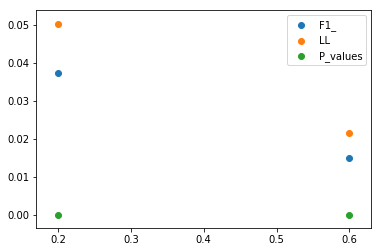

In [26]:
plt.scatter(dic_inversions_F1_.keys(), inversions_avg_F1_)
plt.scatter(dic_inversions_F1_.keys(), inversions_avg_LL)
plt.scatter(dic_inversions_F1_.keys(), p_values)
plt.legend(['F1_', 'LL','P_values'])
plt.show()

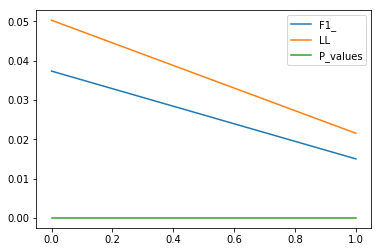

In [27]:
plt.plot(inversions_avg_F1_)
plt.plot(inversions_avg_LL)
plt.plot(p_values)
plt.legend(['F1_', 'LL','P_values'])

plt.show()

## Save Results

In [200]:
with open(address_saving, 'wb') as handle:
    pickle.dump([dic_inversions_F1_,dic_inversions_LL], handle)

# FUNCTIONS

In [8]:
# Linear Function

def g(W,X):
    
    return np.dot(X,w[0,0:-1]) + w[0,-1]

In [9]:
def predicted_labels (df,W):
    N_features = W.shape[1] -1
    for i in range (0 , len(df)):
        Xi = df.iloc[i,0:N_features]
        g_xi = g(W, Xi)
        if g_xi > 0 :
            df.loc[i,'prediction'] = +1
        else:
            df.loc[i,'prediction'] = -1
    return(df['prediction'])

In [10]:
# calculate scores 
def scores(df,rho, writing = False):
    TP = np.sum((df['prediction'] == +1) &  (df ['real_label'] == +1))
    FP = np.sum((df['prediction'] == +1) &  (df ['real_label'] == -1))
    FN = np.sum((df['prediction'] == -1) &  (df ['real_label'] == +1))
    if writing :
        print( 'TP, FP, FN = ', TP, FP, FN)

    pr = TP/(TP+FP)
    re = TP/(TP+FN)
    F_score = 2*pr*re/(pr+re)

    TP_ = np.sum((df['prediction'] == +1) &  (df ['visible_label'] == +1))
    FP_ = np.sum((df['prediction'] == +1) &  (df ['visible_label'] == -1))
    FN_ = np.sum((df['prediction'] == -1) &  (df ['visible_label'] == +1))
    if writing :
        print( 'TP_, FP_, FN_ = ', TP_, FP_, FN_)
    pr_ = TP_/(TP_ + FP_)
    pr_ /= rho
    re_ = TP_/(TP_ + FN_)
    F_score_ = 2*pr_*re_/(pr_+re_)

    L_L_score = re_ **2 / np.sum((df['prediction'] == +1))
    if writing:
        print('np.sum((df[prediction] == +1)) = ', np.sum((df['prediction'] == +1)))
    
    if np.isnan(F_score):
        F_score=0
    if np.isnan(F_score_):
        F_score_=0
    if np.isnan(L_L_score):
        L_L_score=0
    return (F_score , F_score_, L_L_score)

In [11]:

def count_inversions(real_F1s, estimated_scores):
    errors_h = 0

    for i in range(0,len(real_F1s)):
        F1_i = real_F1s[i]
        F1_h_i = estimated_scores[i]
        for j in range(i+1,len(real_F1s)):
            F1_j = real_F1s[j]
            F1_h_j = estimated_scores[j]


            if F1_i > F1_j :
                if F1_h_i < F1_h_j:
                    errors_h += 1

            elif F1_i < F1_j :
                if F1_h_i > F1_h_j:
                    errors_h +=1
                    
    errors_h = errors_h / (len(real_F1s)*(len(real_F1s)-1)/2)

    return(errors_h)